In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

In [3]:
def release(z_plane, model="mandelbrot", c=None, threshold=2, limit=1000):
    image = np.zeros(z_plane.shape, dtype=np.uint8)
    for [i, j], z in np.ndenumerate(z_plane):
        if model == "mandelbrot":
            c = z
        elif model == "julia":
            if c == None:
                raise ValueError("c must be given!")
        else:
            raise ValueError("Model not found!")
        intensity = 0
        while (abs(z) < threshold) and (intensity < limit):
            z = z * z + c
            intensity += 1
        image[i, j] = intensity
    return image

### Create z-plane

In [7]:
width = 800
height = 700
zoom = 0.65
bound = round((1. / zoom), 1)
a = np.arange(-bound, bound, 2. * bound / width)
b = -np.arange(-bound, bound, 2. * bound / height)
z_plane = np.array([np.complex(r, i) for i in b for r in a])
z_plane = z_plane.reshape(height, width)

# Julia

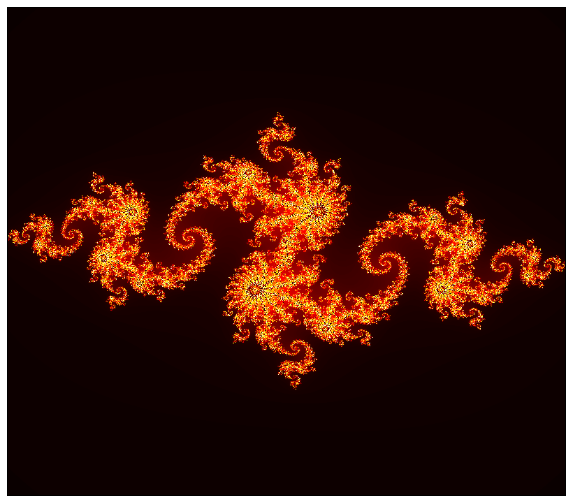

In [8]:
img = release(z_plane, model="julia", c=-0.8 + 0.156j, limit=1000)
#img = img * 255 / img.max()
plt.imshow(img, cmap=plt.cm.hot)
plt.xticks([])
plt.yticks([])
plt.savefig("test.png", bbox_inches='tight', pad_inches=0)
plt.show()

# Mandelbrot

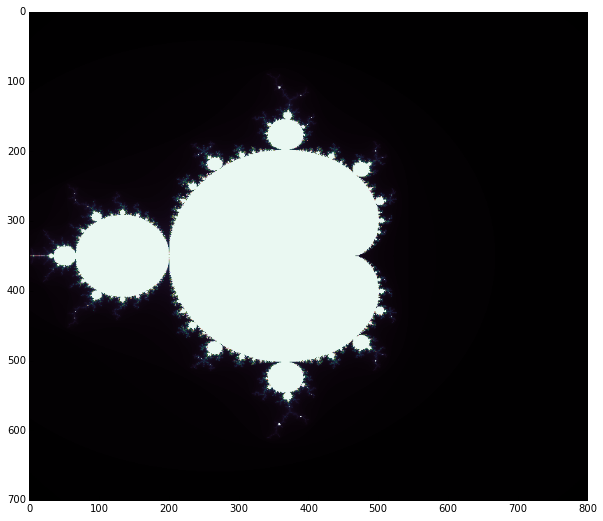

In [9]:
img = release(z_plane, limit=500)
#img = img * 255 / img.max()
plt.imshow(img, cmap=plt.cm.cubehelix)
plt.show()

#### Test

In [153]:
t = np.array([[0.01+0.136j, 0.62 - 0.23j, 0.73 + 0.91j],[0.4, 0.53j, 0.26 + 0.29j],[0.47, 0.809 + 0.11j, 0.9j]])

In [154]:
t

array([[ 0.010+0.136j,  0.620-0.23j ,  0.730+0.91j ],
       [ 0.400+0.j   ,  0.000+0.53j ,  0.260+0.29j ],
       [ 0.470+0.j   ,  0.809+0.11j ,  0.000+0.9j  ]])